# 1. Introduction 

## 1.2 Problem Statement
Your employer wants a quick meeting after you’ve done a first quick pass of the data and wants to know whether further investigation is useful. To achieve this, summarize your findings from Task 1 in seven slides - no need for a title slide - this is just an interim submission. The variables we would like to analyze in the task 1 are:
- Number of xDR sessions
- Session duration
- the total download (DL) and upload (UL) data 
- the total data volume (in Bytes) during this session for each application (Social Media, Google, Email, YouTube, Netflix, Gaming).

The following should be done:
-  Non graphical Univariate analysis - For each of the above variables describing the customers, report in a table the minimum value, the maximum value, the average, the 1st, 2nd & 3rd quartile and provide useful interpretations.
- Graphical Univariate Analysis - For each of the above variables, report plots which show the distribution of the corresponding variable in the whole dataset and provide a one sentence comment per plot.
-  For each of the data consumption applications (Social Media, Google, Email, YouTube, Netflix, Gaming), report a bivariate plot where the application is represented on x axis & the total data (UL+DL) is represented on y axis - comment your results.

## 1.2 Task 1 Overview
- Start by identifying the top 10 handsets used by the customers.
- Then, identify the top 3 handset manufacturers
- Next, identify the top 5 handsets per handset manufacturer
- Make a short interpretation and recommendation to marketing teams

### Task 1.2.1
Aggregate per user the following information in the column  (Jupyter notebook):
- number of xDR sessions
- Session duration
- the total download (DL) and upload (UL) data
- the total data volume (in Bytes) during this session for each application

### Task 1.2.2
Conduct an exploratory data analysis on those data & communicate useful insights. Ensure that you identify and treat all missing values and outliers in the dataset by replacing by the mean of the corresponding column.

You’re expected to report about the following :
- Describe all relevant variables and associated data types (slide).
- Analyze the basic metrics in your DataMart (explain) & their importance for the global objective. - (slide)
- Conduct a Non-Graphical Univariate Analysis by computing position & dispersion parameters for each quantitative variable and provide useful interpretation. - (jupyter notebook + slide )
- Conduct a Graphical Univariate Analysis by identifying the most suitable plotting options for each variable and interpret your findings. - (jupyter notebook + slide )
- Bivariate Analysis – explore the relationship between each application & the total DL+UL data using appropriate methods and interpret your findings. - (jupyter notebook + slide )
- Variable transformations – segment the users into top five decile classes based on the total duration for all sessions and compute the total data (DL+UL) per decile class. - (jupyter notebook + slide )
- Correlation Analysis – compute a correlation matrix for the following variables and interpret your findings: Social Media data, Google data, Email data, Youtube data, Netflix data, Gaming data, Other data - (jupyter notebook + slide )
- Dimensionality Reduction – perform a principal component analysis to reduce the dimensions of your data and provide a useful interpretation of the results (Provide your interpretation in four (4) bullet points-maximum). - (jupyter notebook + slide )

# 2. Data Preparation

In [1]:
# loading libraries and setting up
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
pd.set_option("display.max.columns", None)

In [2]:
# loading our dataset
df = pd.read_excel('Week2_challenge_data_source.xlsx')
df.head()

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps),TCP DL Retrans. Vol (Bytes),TCP UL Retrans. Vol (Bytes),DL TP < 50 Kbps (%),50 Kbps < DL TP < 250 Kbps (%),250 Kbps < DL TP < 1 Mbps (%),DL TP > 1 Mbps (%),UL TP < 10 Kbps (%),10 Kbps < UL TP < 50 Kbps (%),50 Kbps < UL TP < 300 Kbps (%),UL TP > 300 Kbps (%),HTTP DL (Bytes),HTTP UL (Bytes),Activity Duration DL (ms),Activity Duration UL (ms),Dur. (ms).1,Handset Manufacturer,Handset Type,Nb of sec with 125000B < Vol DL,Nb of sec with 1250B < Vol UL < 6250B,Nb of sec with 31250B < Vol DL < 125000B,Nb of sec with 37500B < Vol UL,Nb of sec with 6250B < Vol DL < 31250B,Nb of sec with 6250B < Vol UL < 37500B,Nb of sec with Vol DL < 6250B,Nb of sec with Vol UL < 1250B,Social Media DL (Bytes),Social Media UL (Bytes),Google DL (Bytes),Google UL (Bytes),Email DL (Bytes),Email UL (Bytes),Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,13114483460844900352,2019-04-04 12:01:18,770.0,2019-04-25 14:35:31,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9164566995485190,42.0,5.0,23.0,44.0,NaN,NaN,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,NaN,NaN,37624.0,38787.0,1.823653e+09,Samsung,Samsung Galaxy A5 Sm-A520F,NaN,NaN,NaN,NaN,NaN,NaN,213.0,214.0,1545765.0,24420.0,1634479.0,1271433.0,3563542.0,137762.0,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0
1,13114483482878900224,2019-04-09 13:04:04,235.0,2019-04-25 08:15:48,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,65.0,5.0,16.0,26.0,NaN,NaN,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,NaN,NaN,168.0,3560.0,1.365104e+09,Samsung,Samsung Galaxy J5 (Sm-J530),NaN,NaN,NaN,NaN,NaN,NaN,971.0,1022.0,1926113.0,7165.0,3493924.0,920172.0,629046.0,308339.0,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0
2,13114483484080500736,2019-04-09 17:42:11,1.0,2019-04-25 11:58:13,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,NaN,NaN,6.0,9.0,NaN,NaN,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,1.361763e+09,Samsung,Samsung Galaxy A8 (2018),NaN,NaN,NaN,NaN,NaN,NaN,751.0,695.0,1684053.0,42224.0,8535055.0,1694064.0,2690151.0,672973.0,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0
3,13114483485442799616,2019-04-10 00:31:25,486.0,2019-04-25 07:36:35,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,NaN,NaN,44.0,44.0,NaN,NaN,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,NaN,NaN,3330.0,37882.0,1.321510e+09,undefined,undefined,NaN,NaN,NaN,NaN,NaN,NaN,17.0,207.0,644121.0,13372.0,9023734.0,2788027.0,1439754.0,631229.0,21388122.0,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0
4,13114483499480700928,2019-04-12 20:10:23,565.0,2019-04-25 10:40:32,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,NaN,NaN,6.0,9.0,NaN,NaN,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,1.089009e+09,Samsung,Samsung Sm-G390F,NaN,NaN,NaN,NaN,NaN,NaN,607.0,604.0,862600.0,50188.0,6248284.0,1500559.0,1936496.0,173853.0,15259380.0,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0


# 3. Data Cleaning

In [3]:
# checking the number of records and variables we have
df.shape

(150001, 55)

Our dataset contains 150,001 records and 55 variables.

In [4]:
# previewing our columns
df.columns

Index(['Bearer Id', 'Start', 'Start ms', 'End', 'End ms', 'Dur. (ms)', 'IMSI',
       'MSISDN/Number', 'IMEI', 'Last Location Name', 'Avg RTT DL (ms)',
       'Avg RTT UL (ms)', 'Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)',
       'TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)',
       'DL TP < 50 Kbps (%)', '50 Kbps < DL TP < 250 Kbps (%)',
       '250 Kbps < DL TP < 1 Mbps (%)', 'DL TP > 1 Mbps (%)',
       'UL TP < 10 Kbps (%)', '10 Kbps < UL TP < 50 Kbps (%)',
       '50 Kbps < UL TP < 300 Kbps (%)', 'UL TP > 300 Kbps (%)',
       'HTTP DL (Bytes)', 'HTTP UL (Bytes)', 'Activity Duration DL (ms)',
       'Activity Duration UL (ms)', 'Dur. (ms).1', 'Handset Manufacturer',
       'Handset Type', 'Nb of sec with 125000B < Vol DL',
       'Nb of sec with 1250B < Vol UL < 6250B',
       'Nb of sec with 31250B < Vol DL < 125000B',
       'Nb of sec with 37500B < Vol UL',
       'Nb of sec with 6250B < Vol DL < 31250B',
       'Nb of sec with 6250B < Vol UL < 37500B',


The following variables are not needed so we will drop them:
- Start
- Start ms
- End
- End ms

This is because we already have their range in the 'Dur. (ms).1' variable.

We will also remove the following variables on duration ratio due to irrelevance:
- DL TP < 50 Kbps (%)
- 50 Kbps < DL TP < 250 Kbps (%)
- 250 Kbps < DL TP < 1 Mbps (%)
- DL TP > 1 Mbps (%)
- UL TP < 10 Kbps (%)
- 10 Kbps < UL TP < 50 Kbps (%)
- 50 Kbps < UL TP < 300 Kbps (%)
- UL TP > 300 Kbps (%)

'Dur. (ms)' will also be removed because it returns an unreasonably small value compared to 'Dur. (ms).1'.

Finally, the following variables on number of seconds will be removed because they are not relevant to our current task:
- Nb of sec with 1250B < Vol UL < 6250B
- Nb of sec with 31250B < Vol DL < 125000B
- Nb of sec with 37500B < Vol UL
- Nb of sec with 6250B < Vol DL < 31250B
- Nb of sec with 6250B < Vol UL < 37500B
- Nb of sec with Vol DL < 6250B
- Nb of sec with Vol UL < 1250B
- Nb of sec with 125000B < Vol DL
- Nb of sec with 1250B < Vol UL < 6250B

In [5]:
df.drop(columns = ['Start', 'Start ms', 'End', 'End ms', 'Dur. (ms)', 'DL TP < 50 Kbps (%)',
                   '50 Kbps < DL TP < 250 Kbps (%)', '250 Kbps < DL TP < 1 Mbps (%)', 'DL TP > 1 Mbps (%)',
                   'UL TP < 10 Kbps (%)', '10 Kbps < UL TP < 50 Kbps (%)', '50 Kbps < UL TP < 300 Kbps (%)',
                   'UL TP > 300 Kbps (%)',  'Nb of sec with 31250B < Vol DL < 125000B', 
                   'Nb of sec with 37500B < Vol UL', 'Nb of sec with 6250B < Vol DL < 31250B', 
                   'Nb of sec with 6250B < Vol UL < 37500B', 'Nb of sec with Vol DL < 6250B', 
                   'Nb of sec with Vol UL < 1250B', 'Nb of sec with 125000B < Vol DL', 
                   'Nb of sec with 1250B < Vol UL < 6250B'], inplace = True)

In [6]:
# removing duplicates, if any
df.drop_duplicates(inplace = True)
df.shape

(150001, 34)

No duplicated values found or dropped.

In [7]:
# checking for missing values
df.isna().sum()

Bearer Id                          0
IMSI                             570
MSISDN/Number                   1066
IMEI                             572
Last Location Name              1153
Avg RTT DL (ms)                27829
Avg RTT UL (ms)                27812
Avg Bearer TP DL (kbps)            1
Avg Bearer TP UL (kbps)            1
TCP DL Retrans. Vol (Bytes)    88146
TCP UL Retrans. Vol (Bytes)    96649
HTTP DL (Bytes)                81474
HTTP UL (Bytes)                81810
Activity Duration DL (ms)          1
Activity Duration UL (ms)          1
Dur. (ms).1                        1
Handset Manufacturer             572
Handset Type                     572
Social Media DL (Bytes)            0
Social Media UL (Bytes)            0
Google DL (Bytes)                  0
Google UL (Bytes)                  0
Email DL (Bytes)                   0
Email UL (Bytes)                   0
Youtube DL (Bytes)                 0
Youtube UL (Bytes)                 0
Netflix DL (Bytes)                 0
N

There are a lot of missing values in our dataset. We will impute the numerical variables with their respective means, and the categorical variables with their respective modes.

In [8]:
# getting the data types
df.dtypes

Bearer Id                       object
IMSI                           float64
MSISDN/Number                  float64
IMEI                           float64
Last Location Name              object
Avg RTT DL (ms)                float64
Avg RTT UL (ms)                float64
Avg Bearer TP DL (kbps)        float64
Avg Bearer TP UL (kbps)        float64
TCP DL Retrans. Vol (Bytes)    float64
TCP UL Retrans. Vol (Bytes)    float64
HTTP DL (Bytes)                float64
HTTP UL (Bytes)                float64
Activity Duration DL (ms)      float64
Activity Duration UL (ms)      float64
Dur. (ms).1                    float64
Handset Manufacturer            object
Handset Type                    object
Social Media DL (Bytes)        float64
Social Media UL (Bytes)        float64
Google DL (Bytes)              float64
Google UL (Bytes)              float64
Email DL (Bytes)               float64
Email UL (Bytes)               float64
Youtube DL (Bytes)             float64
Youtube UL (Bytes)       

In [9]:
# get column number of third-last column WITH missing values
third_last = df.columns.get_loc('Handset Type')

fill_missing = []

for i in range(1, third_last + 1):
    fill_missing.append(df.columns[i])
    
# add the last two columns   
fill_missing.append(df.columns[-2])
fill_missing.append(df.columns[-1])

# preview our list of columns with missing values
fill_missing

['IMSI',
 'MSISDN/Number',
 'IMEI',
 'Last Location Name',
 'Avg RTT DL (ms)',
 'Avg RTT UL (ms)',
 'Avg Bearer TP DL (kbps)',
 'Avg Bearer TP UL (kbps)',
 'TCP DL Retrans. Vol (Bytes)',
 'TCP UL Retrans. Vol (Bytes)',
 'HTTP DL (Bytes)',
 'HTTP UL (Bytes)',
 'Activity Duration DL (ms)',
 'Activity Duration UL (ms)',
 'Dur. (ms).1',
 'Handset Manufacturer',
 'Handset Type',
 'Total UL (Bytes)',
 'Total DL (Bytes)']

In [10]:
# looping through our list of missing values while replacing the missing numerical values
# with their respective column means and the missing categorical values with their respective 
# column modes
for column in fill_missing:
    if df[column].dtype == 'object':
        df[column].fillna(df[column].mode()[0], inplace = True)
    elif df[column].dtype == 'float64':
        df[column].fillna(df[column].mean(), inplace = True)
                          
# confirming that we have imputed all missing values
df.isna().sum()

Bearer Id                      0
IMSI                           0
MSISDN/Number                  0
IMEI                           0
Last Location Name             0
Avg RTT DL (ms)                0
Avg RTT UL (ms)                0
Avg Bearer TP DL (kbps)        0
Avg Bearer TP UL (kbps)        0
TCP DL Retrans. Vol (Bytes)    0
TCP UL Retrans. Vol (Bytes)    0
HTTP DL (Bytes)                0
HTTP UL (Bytes)                0
Activity Duration DL (ms)      0
Activity Duration UL (ms)      0
Dur. (ms).1                    0
Handset Manufacturer           0
Handset Type                   0
Social Media DL (Bytes)        0
Social Media UL (Bytes)        0
Google DL (Bytes)              0
Google UL (Bytes)              0
Email DL (Bytes)               0
Email UL (Bytes)               0
Youtube DL (Bytes)             0
Youtube UL (Bytes)             0
Netflix DL (Bytes)             0
Netflix UL (Bytes)             0
Gaming DL (Bytes)              0
Gaming UL (Bytes)              0
Other DL (

In [11]:
# confirming that no duplicates were created during the process
df.duplicated().any()

False

To visualize the distribution of our outliers using boxplots, we will visualize 10 variables per box plot because our dataset has too many variables to preview them all at once.

In [12]:
# creating a list of our numerical variables
num_cols = []

for column in df.columns:
    if df[column].dtype == "float64":
        num_cols.append(column)

# splitting into 3 groups of 10 variables each
group1 = num_cols[:10]
group2 = num_cols[10:20]
group3 = num_cols[20:]

# creating 3 separate sub-datasets
df1 = pd.DataFrame()
df2 = pd.DataFrame()
df3 = pd.DataFrame()

for i, j, k in zip(group1, group2, group3):
    df1[i] = df[i]
    df2[j] = df[j]
    df3[k] = df[k]

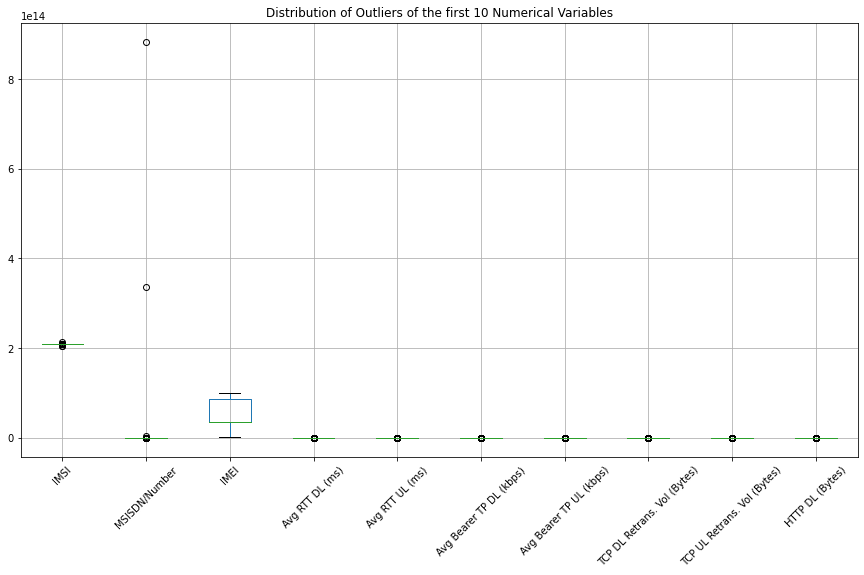

In [13]:
# previewing the boxplots of df1
plt.figure(figsize = (15, 8))
df1.boxplot(rot = 45)
plt.title("Distribution of Outliers of the first 10 Numerical Variables")
plt.show()

Most the variables in the first sub-dataset have outliers. IMEI does not have any outliers. MSISDN/Number has two outliers that are far beyond the upper whisker (maximum value). The rest of the variables have outliers close to their whiskers.

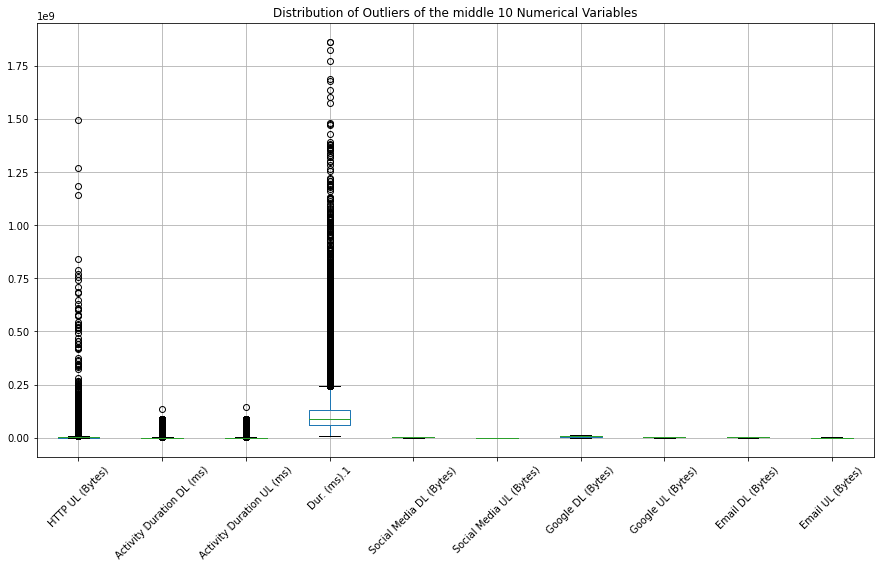

In [14]:
# previewing the boxplots of df2
plt.figure(figsize = (15, 8))
df2.boxplot(rot = 45)
plt.title("Distribution of Outliers of the middle 10 Numerical Variables")
plt.show()

Here we see that the 'HTTP DL (Bytes)' variable has a lot of outliers, while the 'HTTP UL (Bytes)', 'Activity Duration DL (ms)', and the 'Activity Duration UL (ms)' variables have a few outliers in comparison. The rest of the variables in this sub-dataset do not have any outliers.

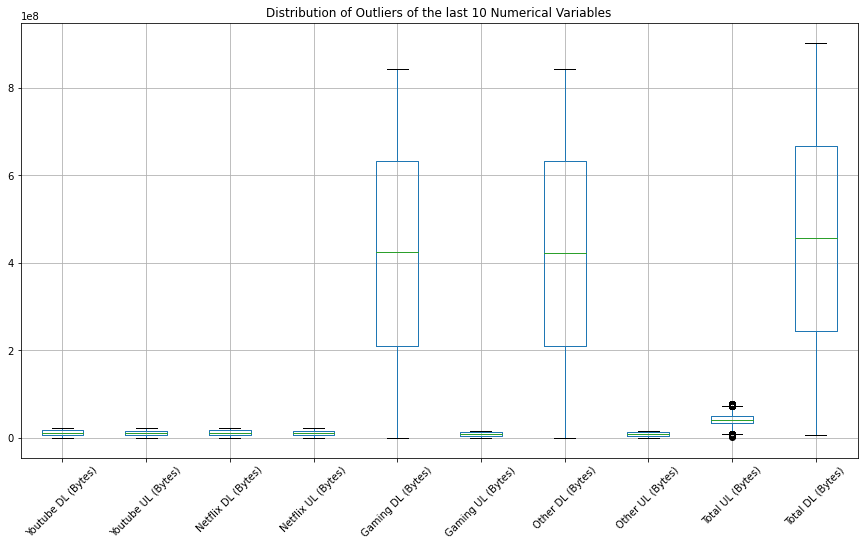

In [15]:
# previewing the boxplots of df3
plt.figure(figsize = (15, 8))
df3.boxplot(rot = 45)
plt.title("Distribution of Outliers of the last 10 Numerical Variables")
plt.show()

In this sub-dataset, the only variable with outliers is 'Total UL (Bytes)'.

In [16]:
df['MSISDN/Number'].describe()

count    1.500010e+05
mean     4.188282e+10
std      2.438731e+12
min      3.360100e+10
25%      3.365151e+10
50%      3.366380e+10
75%      3.368473e+10
max      8.823971e+14
Name: MSISDN/Number, dtype: float64

We will not remove the outliers in this dataset because they could provide us with insightful information later.

In [17]:
# saving to a pickle for easier retrieval
df.to_pickle('week_2_challenge.pkl')

# loading pickle
# df = pd.read_pickle('week_2_challenge.pkl')

# 4. Data Analysis & Visualization

In [18]:
# getting the number of unique values of every variable
for col in df.columns:
    print('{}: {}'.format(col, df[col].nunique()))

Bearer Id: 134709
IMSI: 107266
MSISDN/Number: 106857
IMEI: 107271
Last Location Name: 45547
Avg RTT DL (ms): 2131
Avg RTT UL (ms): 723
Avg Bearer TP DL (kbps): 41754
Avg Bearer TP UL (kbps): 14529
TCP DL Retrans. Vol (Bytes): 54400
TCP UL Retrans. Vol (Bytes): 35121
HTTP DL (Bytes): 63528
HTTP UL (Bytes): 59943
Activity Duration DL (ms): 102561
Activity Duration UL (ms): 106293
Dur. (ms).1: 122872
Handset Manufacturer: 170
Handset Type: 1396
Social Media DL (Bytes): 146856
Social Media UL (Bytes): 59078
Google DL (Bytes): 149024
Google UL (Bytes): 147267
Email DL (Bytes): 146916
Email UL (Bytes): 138699
Youtube DL (Bytes): 149547
Youtube UL (Bytes): 149477
Netflix DL (Bytes): 149518
Netflix UL (Bytes): 149490
Gaming DL (Bytes): 149983
Gaming UL (Bytes): 149316
Other DL (Bytes): 149986
Other UL (Bytes): 149284
Total UL (Bytes): 149729
Total DL (Bytes): 149988


In [19]:
# get top 10 handsets
top_10_handsets = df['Handset Type'].value_counts()[:10]
top_10_handsets

Huawei B528S-23A                20324
Apple iPhone 6S (A1688)          9419
Apple iPhone 6 (A1586)           9023
undefined                        8987
Apple iPhone 7 (A1778)           6326
Apple iPhone Se (A1723)          5187
Apple iPhone 8 (A1905)           4993
Apple iPhone Xr (A2105)          4568
Samsung Galaxy S8 (Sm-G950F)     4520
Apple iPhone X (A1901)           3813
Name: Handset Type, dtype: int64

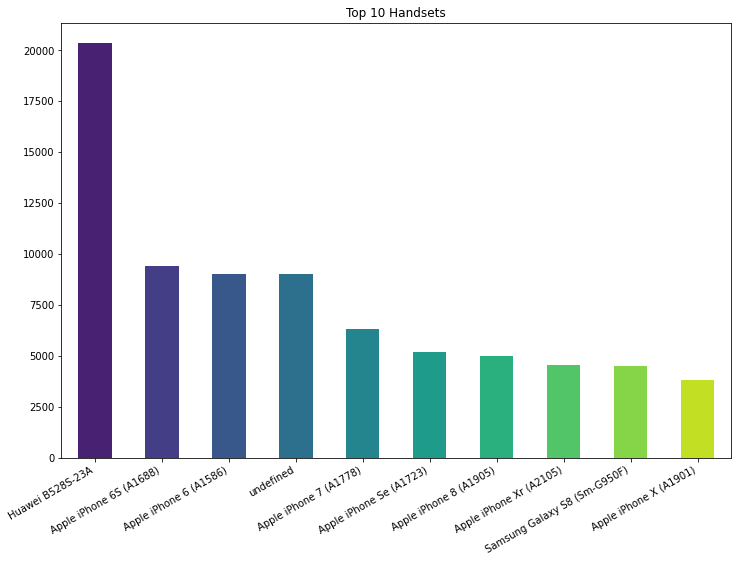

In [20]:
# visualizing the top 10 handsets
plt.figure(figsize = (12, 8))
top_10_handsets.plot(kind = 'bar', rot = 30, color = sns.color_palette('viridis', len(top_10_handsets)))
plt.xticks(ha = "right")
plt.title("Top 10 Handsets")
plt.savefig('top 10 handsets.png')
plt.show()

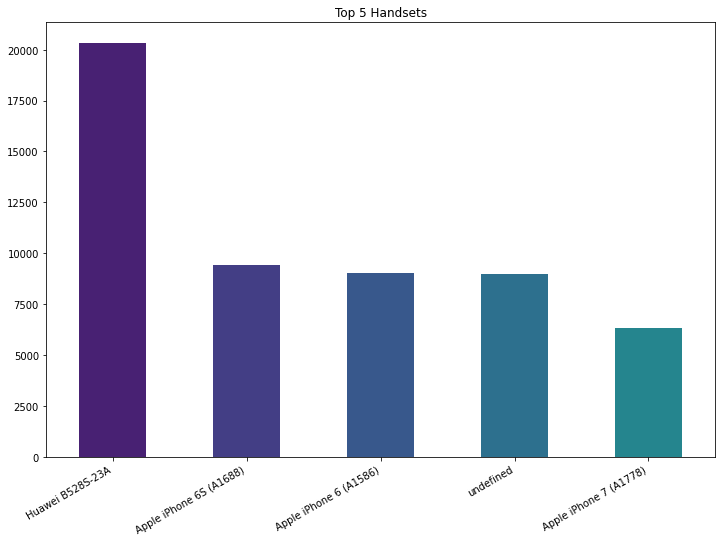

In [35]:
top_5_handsets = top_10_handsets[:5]

# visualizing the top 5 handsets
plt.figure(figsize = (12, 8))
top_5_handsets.plot(kind = 'bar', rot = 30, color = sns.color_palette('viridis', len(top_10_handsets)))
plt.xticks(ha = "right")
plt.title("Top 5 Handsets")
plt.savefig('top 5 handsets.png')
plt.show()

In [22]:
# get top 3 handset manufacturers
top_10_manufacturers = df['Handset Manufacturer'].value_counts()[:3]
top_10_manufacturers

Apple      60137
Samsung    40839
Huawei     34423
Name: Handset Manufacturer, dtype: int64

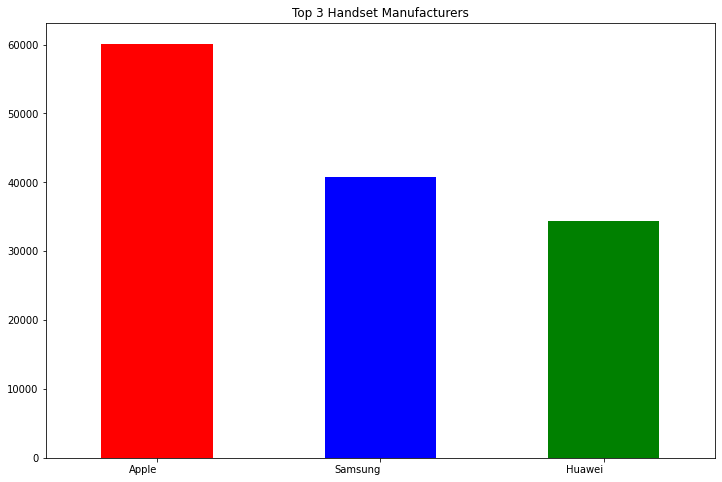

In [23]:
# visualizing the top 3 handset manufacturers
plt.figure(figsize = (12, 8))
top_10_manufacturers.plot(kind = 'bar', rot = 0, color = ['red', 'blue', 'green'])
plt.xticks(ha = "right")
plt.title("Top 3 Handset Manufacturers")
plt.savefig('top 3 manufacturers.png')
plt.show()

In [24]:
# get manufacturers
apple = df.loc[df['Handset Manufacturer'] == 'Apple']
samsung = df.loc[df['Handset Manufacturer'] == 'Samsung']
huawei = df.loc[df['Handset Manufacturer'] == 'Huawei']

# get top 5 handsets per manufacturer
top_5_apple = apple['Handset Type'].value_counts()[:5]
print("Top 5 Apple handsets:")
print(top_5_apple)

top_5_samsung = samsung['Handset Type'].value_counts()[:5]
print("\nTop 5 Samsung handsets:")
print(top_5_samsung)

top_5_huawei = huawei['Handset Type'].value_counts()[:5]
print("\nTop 5 Huawei handsets:")
print(top_5_huawei)

Top 5 Apple handsets:
Apple iPhone 6S (A1688)    9419
Apple iPhone 6 (A1586)     9023
Apple iPhone 7 (A1778)     6326
Apple iPhone Se (A1723)    5187
Apple iPhone 8 (A1905)     4993
Name: Handset Type, dtype: int64

Top 5 Samsung handsets:
Samsung Galaxy S8 (Sm-G950F)    4520
Samsung Galaxy A5 Sm-A520F      3724
Samsung Galaxy J5 (Sm-J530)     3696
Samsung Galaxy J3 (Sm-J330)     3484
Samsung Galaxy S7 (Sm-G930X)    3199
Name: Handset Type, dtype: int64

Top 5 Huawei handsets:
Huawei B528S-23A                  19752
Huawei E5180                       2079
Huawei P20 Lite Huawei Nova 3E     2021
Huawei P20                         1480
Huawei Y6 2018                      997
Name: Handset Type, dtype: int64


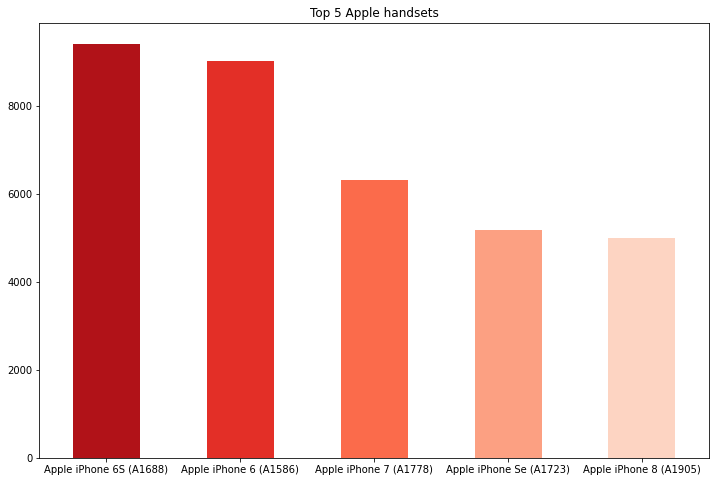

In [25]:
# visualizing top 5 Apple handsets
plt.figure(figsize = (12, 8))
top_5_apple.plot(kind = 'bar', rot = 0, color = sns.color_palette('Reds_r', len(top_5_apple)))
plt.xticks(ha = "center")
plt.title("Top 5 Apple handsets")
plt.savefig('top 5 apple handsets.png')
plt.show()

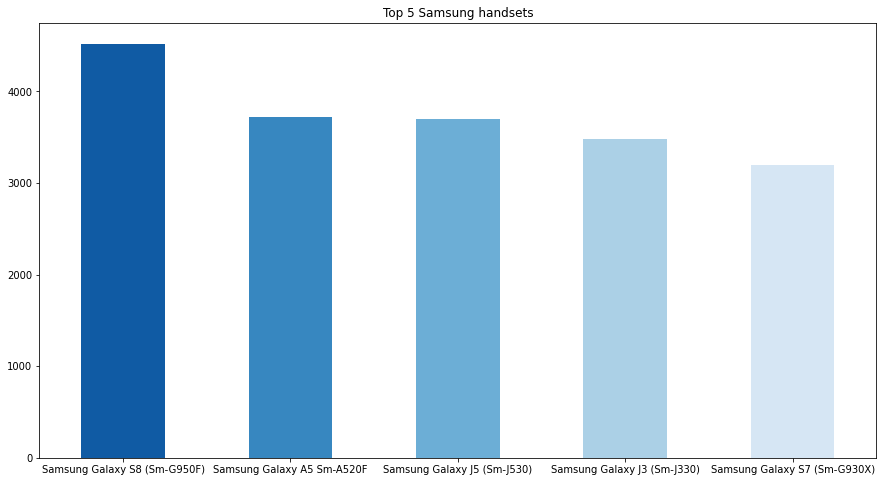

In [26]:
# visualizing top 5 Samsung handsets
plt.figure(figsize = (15, 8))
top_5_samsung.plot(kind = 'bar', rot = 0, color = sns.color_palette('Blues_r', len(top_5_apple)))
plt.xticks(ha = "center")
plt.title("Top 5 Samsung handsets")
plt.savefig('top 5 samsung handsets.png')
plt.show()

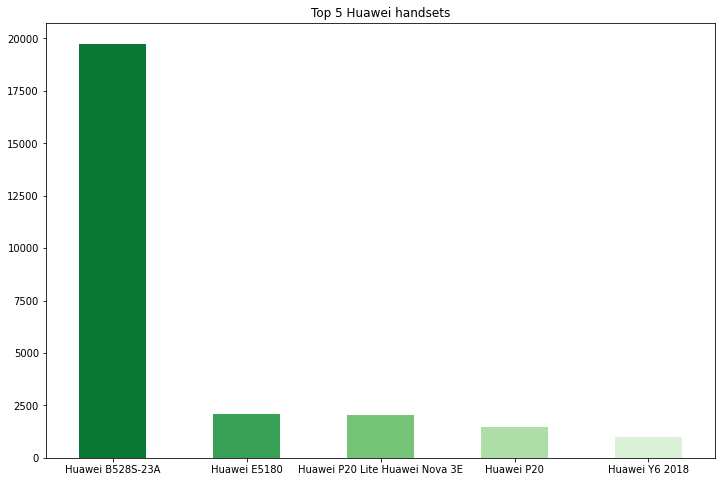

In [27]:
# visualizing top 5 Huawei handsets
plt.figure(figsize = (12, 8))
top_5_huawei.plot(kind = 'bar', rot = 0, color = sns.color_palette('Greens_r', len(top_5_apple)))
plt.xticks(ha = "center")
plt.title("Top 5 Huawei handsets")
plt.savefig('top 5 huawei handsets.png')
plt.show()

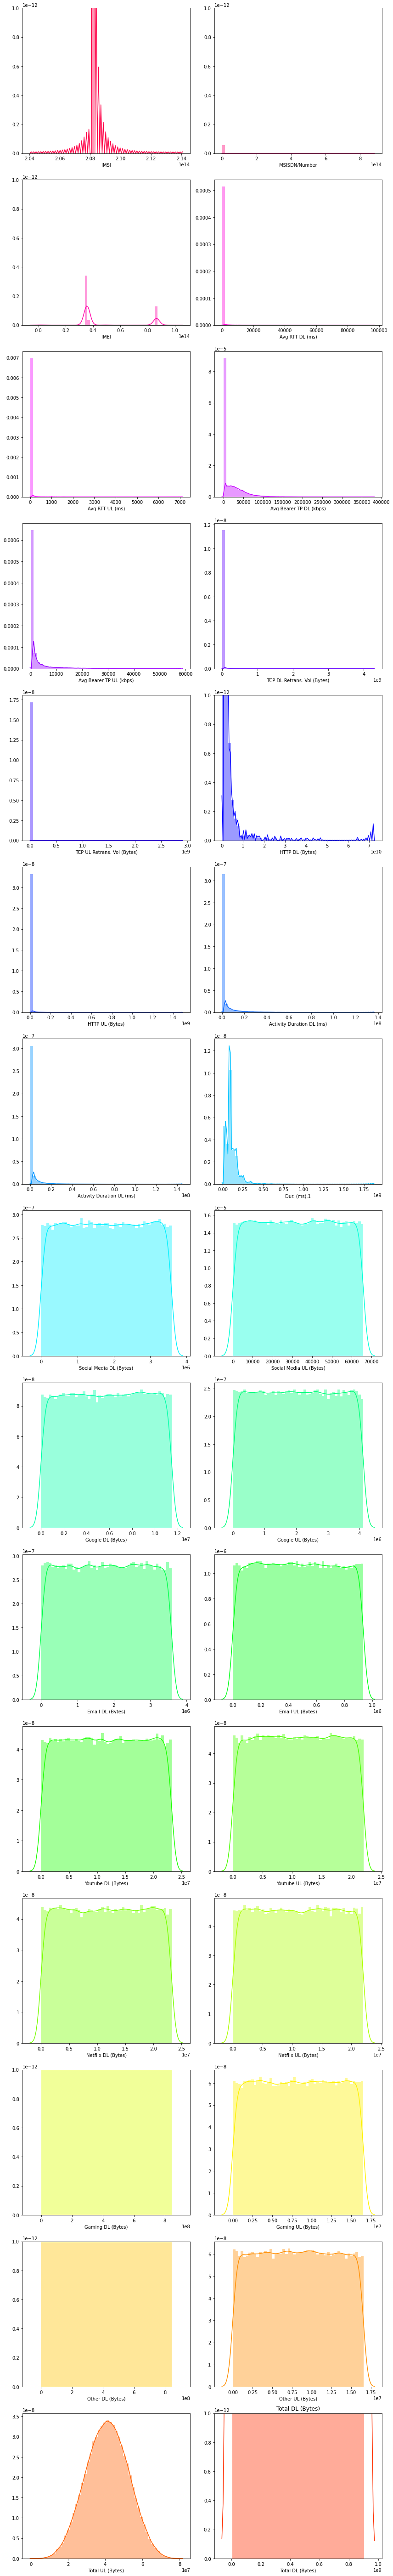

In [28]:
# distribution plots of our numerical variables
fig, axes = plt.subplots(nrows = 15, ncols = 2, figsize = (12, 78))
colors = sns.color_palette("hsv_r", len(num_cols))

for col, color, ax in zip(num_cols, colors, axes.flatten()):
    sns.distplot(df[col], ax = ax, color = color)
    plt.title(col)
    
plt.tight_layout()

There are 134,709 unique sessions.

Majority of the variables are skewed strongly to the right.

UL and DL for Social Media, Google, Email, YouTube, Netflix, Gaming, and Other have a block-shaped distribution.

Interestingly, the distribution of Total UL is almost perfectly normal, save for its sharp peak.

In [29]:
# getting total sessions per user
total_sessions = pd.DataFrame(df.groupby('MSISDN/Number')['Bearer Id'].count())
total_sessions.reset_index(inplace = True)
total_sessions.columns = ['MSISDN/Number', 'NumberOfSessions']
total_sessions.head()

,MSISDN/Number,NumberOfSessions
0,3.360100e+10,1
1,3.360100e+10,1
2,3.360100e+10,1
3,3.360101e+10,1
4,3.360101e+10,2


In [30]:
# getting total duration per user
total_duration = pd.DataFrame(df.groupby('MSISDN/Number')['Dur. (ms).1'].sum())
total_duration.reset_index(inplace = True)
total_duration.columns = ['MSISDN/Number', 'TotalDuration (ms)']
total_duration.head()

,MSISDN/Number,TotalDuration (ms)
0,3.360100e+10,116720140.0
1,3.360100e+10,181230963.0
2,3.360100e+10,134969374.0
3,3.360101e+10,49878024.0
4,3.360101e+10,37104453.0


In [31]:
# get total download (DL) and upload (UL) data per user
total_DL_UL = pd.DataFrame(df.groupby('MSISDN/Number')[['Total DL (Bytes)', 'Total UL (Bytes)']].sum())
total_DL_UL.reset_index(inplace = True)
total_DL_UL.columns = ['MSISDN/Number', 'TotalDL (bytes)', 'TotalUL (bytes)']
total_DL_UL['TotalData'] = total_DL_UL['TotalDL (bytes)'] + total_DL_UL['TotalUL (bytes)']
total_DL_UL.head()

,MSISDN/Number,TotalDL (bytes),TotalUL (bytes),TotalData
0,3.360100e+10,8.426375e+08,36053108.0,8.786906e+08
1,3.360100e+10,1.207552e+08,36104459.0,1.568596e+08
2,3.360100e+10,5.566597e+08,39306820.0,5.959665e+08
3,3.360101e+10,4.019932e+08,20327526.0,4.223207e+08
4,3.360101e+10,1.363130e+09,94280527.0,1.457411e+09


In [32]:
# get total data volume for each application per user
total_application = pd.DataFrame(df.groupby('MSISDN/Number')[['HTTP DL (Bytes)', 'HTTP UL (Bytes)', 
                                                 'Social Media DL (Bytes)', 'Social Media UL (Bytes)',
                                                 'Google DL (Bytes)', 'Google UL (Bytes)', 
                                                 'Email DL (Bytes)', 'Email UL (Bytes)', 
                                                 'Youtube DL (Bytes)', 'Youtube UL (Bytes)', 
                                                 'Netflix DL (Bytes)', 'Netflix UL (Bytes)', 
                                                 'Gaming DL (Bytes)', 'Gaming UL (Bytes)', 
                                                 'Other DL (Bytes)', 'Other UL (Bytes)']].sum())
total_application.reset_index(inplace = True)
total_app_columns = ['MSISDN/Number', 'HTTP DL (Bytes)', 'HTTP UL (Bytes)', 'Social Media DL (Bytes)',
                     'Social Media UL (Bytes)', 'Google DL (Bytes)', 'Google UL (Bytes)', 
                     'Email DL (Bytes)', 'Email UL (Bytes)', 'Youtube DL (Bytes)', 'Youtube UL (Bytes)',
                     'Netflix DL (Bytes)', 'Netflix UL (Bytes)','Gaming DL (Bytes)', 'Gaming UL (Bytes)',
                     'Other DL (Bytes)', 'Other UL (Bytes)']

total_application.columns = total_app_columns

# getting the total data (DL + UL) of each application
total_application['HTTP (bytes)'] = total_application['HTTP DL (Bytes)'] + total_application['HTTP UL (Bytes)']
total_application['Social Media (bytes)'] = total_application['Social Media DL (Bytes)'] + total_application['Social Media UL (Bytes)']
total_application['Google (bytes)'] = total_application['Google DL (Bytes)'] + total_application['Google UL (Bytes)']
total_application['Email (bytes)'] = total_application['Email DL (Bytes)'] + total_application['Email UL (Bytes)']
total_application['Youtube (bytes)'] = total_application['Youtube DL (Bytes)'] + total_application['Youtube UL (Bytes)']
total_application['Netflix (bytes)'] = total_application['Netflix DL (Bytes)'] + total_application['Netflix UL (Bytes)']
total_application['Gaming (bytes)'] = total_application['Gaming DL (Bytes)'] + total_application['Gaming UL (Bytes)']
total_application['Other (bytes)'] = total_application['Other DL (Bytes)'] + total_application['Other UL (Bytes)']

# dropping the UL and DL columns 
total_app_columns.remove('MSISDN/Number')
total_application.drop(columns = total_app_columns, inplace = True)
total_application.head()

,MSISDN/Number,HTTP (bytes),Social Media (bytes),Google (bytes),Email (bytes),Youtube (bytes),Netflix (bytes),Gaming (bytes),Other (bytes)
0,3.360100e+10,1.177133e+08,2232135.0,4389005.0,1331362.0,21624548.0,27180981.0,8.124587e+08,386570872.0
1,3.360100e+10,1.177133e+08,2660565.0,5334863.0,3307781.0,12432223.0,11221763.0,1.197501e+08,281710071.0
2,3.360100e+10,1.177133e+08,3195623.0,3443126.0,3205380.0,21333570.0,19353900.0,5.388277e+08,501693672.0
3,3.360101e+10,9.402000e+03,280294.0,9678493.0,2284670.0,6977321.0,1942092.0,3.911261e+08,35279702.0
4,3.360101e+10,3.076552e+08,2912542.0,18499616.0,3305469.0,41533002.0,49201724.0,1.314798e+09,804804484.0


In [33]:
# getting the descriptive statistics of the necessary data
desc_stats = pd.DataFrame()
desc_stats['Number_xDR_sessions'] = total_sessions['NumberOfSessions']
desc_stats['Duration'] = total_duration['TotalDuration (ms)']
desc_stats['Total_UL'] = total_DL_UL['TotalUL (bytes)']
desc_stats['Total_DL'] = total_DL_UL['TotalDL (bytes)']
desc_stats['TotalData'] = total_DL_UL['TotalData']
desc_stats['HTTP_data'] = total_application['HTTP (bytes)']
desc_stats['Social_Media_data'] = total_application['Social Media (bytes)']
desc_stats['Google_data'] = total_application['Google (bytes)']
desc_stats['Email_data'] = total_application['Email (bytes)']
desc_stats['Youtube_data'] = total_application['Youtube (bytes)']
desc_stats['Netflix_data'] = total_application['Netflix (bytes)']
desc_stats['Gaming_data'] = total_application['Gaming (bytes)']
desc_stats['Other_data'] = total_application['Other (bytes)']

# getting the descriptive statistics
desc_stats.describe().T

,count,mean,std,min,25%,50%,75%,max
Number_xDR_sessions,106857.0,1.403755e+00,3.355032e+00,1.0,1.0,1.000000e+00,2.000000e+00,1.066000e+03
Duration,106857.0,1.468455e+08,2.894660e+08,7142988.0,71309222.0,1.027413e+08,1.728000e+08,7.255155e+10
Total_UL,106857.0,5.772408e+07,1.401591e+08,2866892.0,36395537.0,4.679434e+07,6.573376e+07,4.436642e+10
Total_DL,106857.0,6.382078e+08,1.559802e+09,8827082.0,314830188.0,5.703713e+08,8.073701e+08,4.873783e+11
TotalData,106857.0,6.959319e+08,1.697158e+09,33249009.0,358552970.0,6.179232e+08,8.574358e+08,5.317447e+11
HTTP_data,106857.0,1.652406e+08,8.503438e+08,80.0,16617432.0,1.177133e+08,1.177986e+08,7.302069e+10
Social_Media_data,106857.0,2.566415e+06,6.325032e+06,1563.0,1211309.0,2.303811e+06,3.307524e+06,1.973817e+09
Google_data,106857.0,1.095953e+07,2.630542e+07,40330.0,5942683.0,9.586186e+06,1.321496e+07,8.248577e+09
Email_data,106857.0,3.171225e+06,7.661339e+06,18176.0,1674484.0,2.799854e+06,3.847205e+06,2.399880e+09
Youtube_data,106857.0,3.178589e+07,7.735388e+07,78903.0,18631449.0,2.680040e+07,3.792829e+07,2.434073e+10


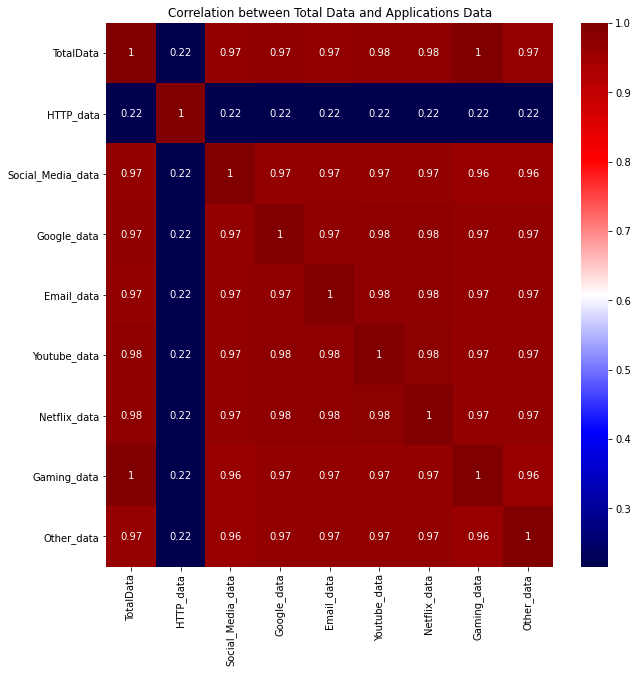

In [34]:
# plotting the correlations of the total data against the application data
to_plot = desc_stats.iloc[:, 4:]
corr = to_plot.corr()

plt.figure(figsize = (10, 10))
sns.heatmap(corr, annot = True, cmap = "seismic")
plt.title("Correlation between Total Data and Applications Data")
plt.savefig("total vs application corr.png")
plt.show()

All application data, appart from HTTP data, correlated very highly with Total Data, particularly Gaming data which was perfectly correlated with it.